##1. MNIST 데이터셋에 대한 DNN

In [ ]:
import keras

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

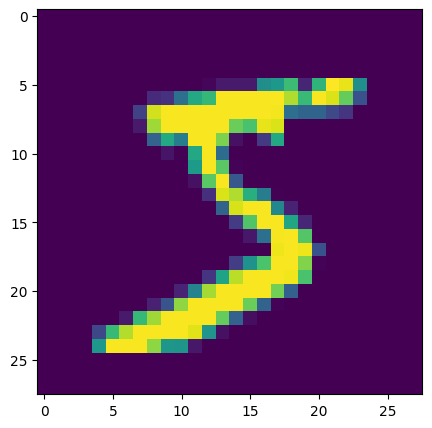

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
plt.imshow(x_train[0])
plt.show()

In [ ]:
x_train.shape  # 3D 0~255는 색의 진함을 나타냄.
# 28*28이 6만개 있음.

(60000, 28, 28)

In [ ]:
x_train.reshape(60000, 28 * 28) # 한줄로 한개 6만개로

In [ ]:
x_train.reshape(60000, 28 * 28).reshape(60000,28,28) # 다시 28*28이 6만개로

In [ ]:
# reshape and normalizatio   (민맥스 스케일링)
x_train = x_train.reshape((60000, 28 * 28)) / 255.0
x_test = x_test.reshape((10000, 28 * 28)) / 255.0

In [ ]:
y_train =  tf.keras.utils.to_categorical(y_train, 10)  # 카테고리칼이 원핫 인코딩
y_test =  tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#################### 이 부분 중요함

# Sequential model
model = tf.keras.models.Sequential()

# Stacking layers
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))   # input_shape=(28*28,)이거는 처음에만 해도 된다. 위에 적혀있음.
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
######## 이 부분도 중요한 듯
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=keras.losses.categorical_crossentropy)
# 이거는 안해도 됩니다. 학습률 지정할 수 있음

In [ ]:
model.fit(x_train, y_train,  epochs=5, verbose=1, validation_split=0.2) # verbose가 0이면 자세하게 1이면 적당히 낮으면 자세히 아마??, validation_split는 검증하기 위해서 매 에포크마다 그리고 보여주는 것
# 발리데이션은 훈련 안한 새 문제로 테스트하는 것임

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2712 - accuracy: 0.9206 - val_loss: 0.1436 - val_accuracy: 0.9584
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1170 - accuracy: 0.9649 - val_loss: 0.0982 - val_accuracy: 0.9707
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9759 - val_loss: 0.1147 - val_accuracy: 0.9644
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0963 - val_accuracy: 0.9721
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.1153 - val_accuracy: 0.9664


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1100 - accuracy: 0.9685


[0.11000213772058487, 0.968500018119812]

79/79 [==============================] - 0s 2ms/step


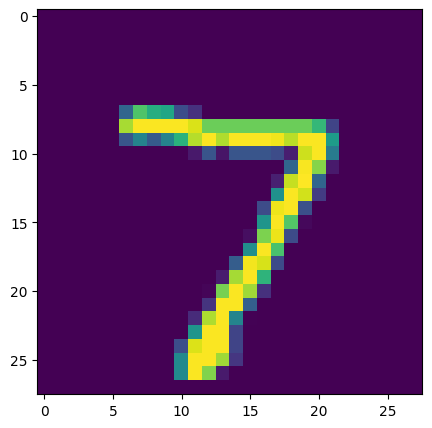

In [ ]:
preds = model.predict(x_test, batch_size=128)  # 프레딕하면 예측값 나옴
preds[0]
np.argmax(preds[0])  # 뒤에 나오니까
plt.imshow(x_test[0].reshape(28, 28))
plt.show()

In [ ]:
# Save the entire model to a HDF5 file.
model.save('mnist_dnn_model.h5')
new_model = tf.keras.models.load_model('mnist_dnn_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##2. DNN 하이퍼 파라미터 튜닝
 - 런타임 유형 변경!
 - DNN의 하이터파라미터: 층의 수, 노드의 수, 학습율, 배치크기 등
 - RadomizedSerachCV 또는 GridSearchCV 등 활용

In [ ]:
# 그리드서치 시브이 말고 이번에는  전문적으로 케라스 튜나 쓸거야

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [ ]:
label_train = tf.keras.utils.to_categorical(label_train, 10)
label_test = tf.keras.utils.to_categorical(label_test, 10)

- 하이퍼튜닝을 위한 모형 구축 시 하이퍼 파라미터 탐색 공간 정의
- 하이퍼 모델: 하이퍼튜닝을 위해 설정하는 모델

- 하이퍼 모형의 설정
 - 모델 빌더 함수 사용: Keras Tuner API의 HyperModel 클래스를 하위 클래스화
 - 컴파일된 모델을 반환하고 인라인으로 정의한 하이퍼파라미터를 사용하여 모델을 하이퍼튜닝

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))   #reshape 2d image ->1d row

  hp_units = hp.Int('units', min_value=4, max_value=12, step=4)
  model.add(keras.layers.Dense(units=hp_units, activation='relu' ))
  model.add(keras.layers.Dense(10, activation="softmax"))

  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = "categorical_crossentropy",  #sparse_categorical_crossentropy와 categorical_crossentropy의 차이는 타겟의 OHE여부
                metrics = ['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective("val_accuracy", "max"), #objective=kt.Objective("val_loss", "min"),
                     max_epochs=3,
                     directory='my_dir',
                     project_name='intro_to_kt2')

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback): #조기 학습 중단을 위해 사용
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
#하이퍼 파라미터 탐색 실행, model.fit과 동일
tuner.search(img_train, label_train, epochs=10, validation_split=0.1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Trial 6 Complete [00h 00m 21s]
val_accuracy: 0.6223333477973938

Best val_accuracy So Far: 0.8433333039283752
Total elapsed time: 00h 01m 29s


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
optimal number of units:  {best_hps.get('units')}
optimal learning rate for the optimizer:  {best_hps.get('learning_rate')}
""")


optimal number of units:  8
optimal learning rate for the optimizer:  0.001



In [ ]:
label_train.shape

(60000, 10)

In [ ]:
#탐색을 통해 찾은 하이퍼파라미터로 훈련 시 최적의 epoch을 발견
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=10, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1531 - accuracy: 0.5257 - val_loss: 0.9071 - val_accuracy: 0.6159
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.8896 - accuracy: 0.6235 - val_loss: 0.8651 - val_accuracy: 0.6239
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8608 - accuracy: 0.6372 - val_loss: 0.8583 - val_accuracy: 0.6555
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8454 - accuracy: 0.6495 - val_loss: 0.8363 - val_accuracy: 0.6505
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8306 - accuracy: 0.6566 - val_loss: 0.8526 - val_accuracy: 0.6586
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8168 - accuracy: 0.6778 - val_loss: 0.8315 - val_accuracy: 0.7053
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7956 - accuracy: 0.7071 - val_loss: 0.9552 - val_accuracy:

In [ ]:
#최적 모형 객체 만들기
hypermodel = tuner.hypermodel.build(best_hps)

# 최적 epoch으로 학습
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/9
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7401 - accuracy: 0.7392 - val_loss: 0.5314 - val_accuracy: 0.8142
Epoch 2/9
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4873 - accuracy: 0.8319 - val_loss: 0.4690 - val_accuracy: 0.8378
Epoch 3/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4536 - accuracy: 0.8432 - val_loss: 0.4523 - val_accuracy: 0.8447
Epoch 4/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4389 - accuracy: 0.8458 - val_loss: 0.4552 - val_accuracy: 0.8399
Epoch 5/9
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4278 - accuracy: 0.8505 - val_loss: 0.4467 - val_accuracy: 0.8418
Epoch 6/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4192 - accuracy: 0.8536 - val_loss: 0.4709 - val_accuracy: 0.8345
Epoch 7/9
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4166 - accuracy: 0.8525 - val_loss: 0.4327 - val_accuracy: 0.8500

In [ ]:
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 2ms/step - loss: 0.4615 - accuracy: 0.8398
[test loss, test accuracy]: [0.46148985624313354, 0.8398000001907349]
